# The Bias-Variance-Tradeoff

- Bias is defined as the difference of the average value of prediction (over different realizations of training data) to the true underlying function f(x) for a given unseen (test) point x.
- Variance is defined as the mean squared deviation of f̂(x) from its expected value 𝔼[f̂(x)] over different realizations of training data.

In [ ]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt 


# True underlying function 
def f(x):
  return 0.5 * x + np.sqrt(np.max(x,0)) - np.cos(x) + 2

In [ ]:
# Variables
N = 1000
sigma_epsilon = 1 # standard deviation of error
x_max = 3
x_test = 3.2
x_range = np.linspace(-x_max, x_max, N)

x = x_max * (2 * np.random.rand(N) - 1)
epsilon = sigma_epsilon * np.random.randn(N) # Draw 1000 random samples

y = f(x) + epsilon 
y_test = f(x_test) + sigma_epsilon * np.random.randn()

In [ ]:
print(x_range[:10])
print(f(x_range)[:10])

[-3.         -2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997
 -2.96396396 -2.95795796 -2.95195195 -2.94594595]
[3.2220433  3.22418089 3.22628279 3.22834905 3.2303797  3.23237476
 3.23433429 3.23625831 3.23814686 3.23999999]


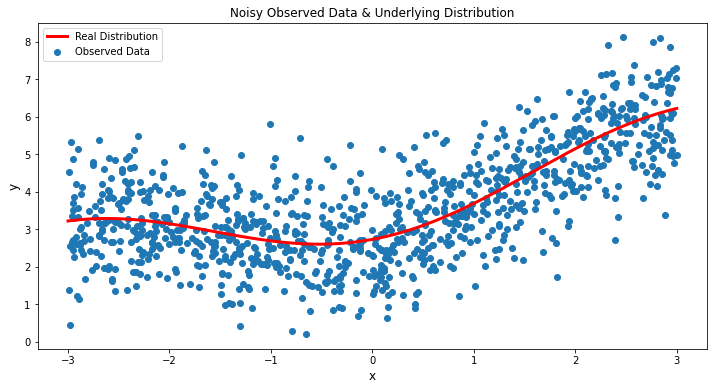

In [ ]:
# Plot 
plt.figure(figsize=(12,6))
plt.scatter(x, y, label="Observed Data")
plt.plot(x_range, f(x_range), "r", linewidth=3.0, label="Real Distribution")
#plt.scatter(x_test, y_test, c="g", label="Test point")

# Plot annotation
plt.xlabel("x", size=12)
plt.ylabel("y", size=12)
plt.title("Noisy Observed Data & Underlying Distribution")
plt.legend()
plt.show()

In [ ]:
def f_hat(x, w):
    d = len(w) - 1
    return np.sum(w * np.power(x, np.expand_dims(np.arange(d, -1, -1), 1)).T, 1)

n = int(0.02 * N)
colors = np.array(["tab:green", "tab:purple", "tab:cyan", "tab:orange"])
d_arr = [1,2,3,5]

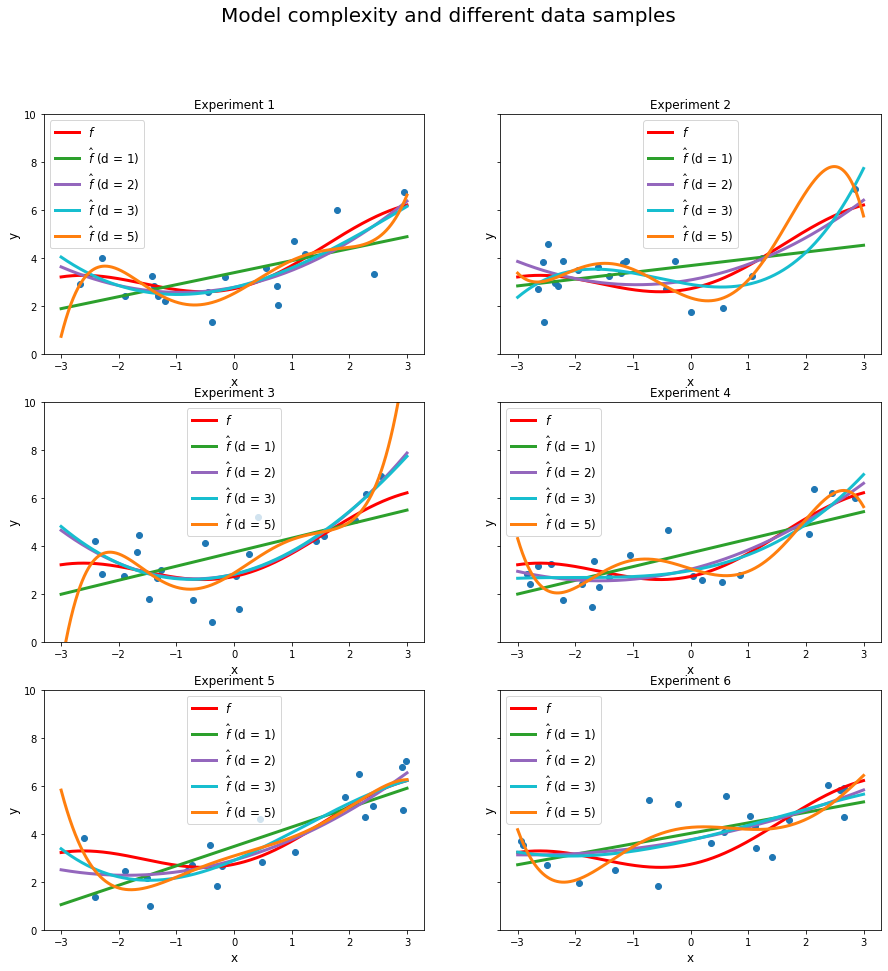

In [ ]:
cnt = 1 
fig, axs = plt.subplots(3,2, sharey=True, figsize=(15,15))
for i in range(3):
  for j in range(2):
    idx = np.random.permutation(N)[:n]
    x_train, y_train = x[idx], y[idx]

    w = []
    for d in d_arr:
      w.append(np.polyfit(x_train, y_train, d))
    
    axs[i,j].scatter(x_train, y_train)
    axs[i,j].plot(x_range, f(x_range), "r", lw=3.0)

    for k in range(len(w)):
      axs[i,j].plot(x_range, f_hat(x_range, w[k]), colors[k], lw=3.0)

    # axs[i, j].scatter(x_test, y_test, c='r')
    # for k in range(len(w)):
    #     axs[i, j].scatter(x_test, f_hat(x_test, w[k]), c=colors[k])

    axs[i, j].set_xlabel("x", size=12)
    axs[i, j].set_ylabel("y", size=12)
    axs[i, j].set_ylim([0,10])

    axs[i, j].legend([r'$f$', r'$\hat{f}$ (d = 1)', r'$\hat{f}$ (d = 2)', 
                          r'$\hat{f}$ (d = 3)', r'$\hat{f}$ (d = 5)'], fontsize=12)
    axs[i, j].title.set_text(f"Experiment {cnt}")
    cnt +=1
    
fig.suptitle("Model complexity and different data samples", size=20)
plt.show()

# Simulating 10,000 different experiments 


In [ ]:
R = 10000
d_arr = [1,2,3,5]
y_hat_test = np.zeros((len(d_arr), R))

for r in range(R):
  n = int(0.02 * N)
  idx = np.random.permutation(N)[:n]
  x_train, y_train = x[idx], y[idx]

  for k in range(len(d_arr)):
    d = d_arr[k]
    w = np.polyfit(x_train, y_train, d)
    y_hat_test[k,r] = f_hat(x_test, w)

y_hat_test_mean = np.mean(y_hat_test, 1)
y_hat_test_std = np.std(y_hat_test, 1)

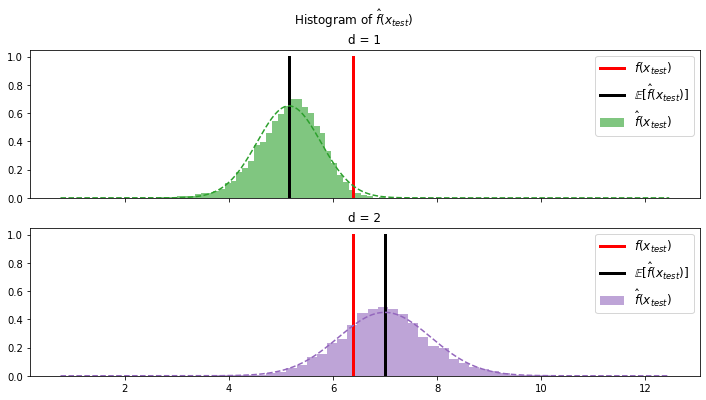

In [ ]:
fig, axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(12,6))

for k in range(2):
  axs[k].hist(y_hat_test[k], density=True, color = colors[k], alpha=0.6, bins=50)
  xlim = axs[k].get_xlim()
  axs[k].plot([f(x_test), f(x_test)], [0,1], "r", lw=3.0)
  axs[k].plot([y_hat_test_mean[k], y_hat_test_mean[k]], [0,1], c="k", lw=3)
  axs[k].title.set_text(f"d = {d_arr[k]}")
  axs[k].legend([r'$f(x_{test})$', r'$\mathbb{E}[\hat{f}(x_{test})]$', r'$\hat{f}(x_{test})$'], fontsize=12)

for k in range(2):
  x_range = np.linspace(xlim[0], xlim[1], 1000)
  axs[k].plot(x_range, stats.norm.pdf(x_range, y_hat_test_mean[k], 
                                      y_hat_test_std[k]), color=colors[k], ls="--")
  
plt.suptitle(r'Histogram of $\hat{f}(x_{test})$', size=12)
plt.show()

- hte mean of f̂(x), 𝔼[f̂(x)], represented by the black line is further from true f(x) (red line) for the linear regression model than it is for the quadratic one. 
- This is the bias: the deviation from the true model when our model assumptions are overly simplistic. 

- On the other hand, the variance of f̂(x), var(f̂(x)) is larger on the quadratic model than the linear one as we see by the larger spread of the bottom histogram. 
- This is the variance problem, in other words, the larger dependence of f̂(x) on small fluctuations of the training data.

# More test points
- Now let’s consider 1,000 test points and compute the average test MSE (over these points). 
- We also compute the average squared bias (over these 1,000 test points) and average variance. If we do this for five models, from degree d=0 (horizontal line) all the way to degree d=4, we get the following plot.

In [ ]:
R = 10000
n = int(0.02 * N)
n_test = 1000
d_arr = np.arange(5)

x_test = x_max + np.random.rand(n_test) - 0.5 # shape: (n_test,)
epsilon = sigma_epsilon * np.random.randn(n_test) # shape: (n_test,)
y_test = f(x_test) + epsilon # shape: (n_test,)

train_squared_error = np.zeros((len(d_arr), R)) # shape: (len(d_arr), R)
y_hat_test = np.zeros((len(d_arr), R, n_test)) # shape: (len(d_arr), R, n_test)

In [ ]:
for r in range(R):
    n = int(.02 * N)
    idx = np.random.permutation(N)[:n]
    x_train, y_train = x[idx], y[idx]  # shape: (n,), (n,)
    for k in range(len(d_arr)):
        d = d_arr[k]
        w = np.polyfit(x_train, y_train, d)
        train_squared_error[k, r] = np.mean((y_train - f_hat(x_train, w)) ** 2)  # train MSE for a specific realization
        y_hat_test[k, r, :] = f_hat(x_test, w)  # test set predictions for a specific realization

test_squared_error = np.mean((y_hat_test - y_test) ** 2, 1)  # shape: (len(d_arr), n_test)
bias_squared = (np.mean(y_hat_test, 1) - f(x_test)) ** 2  # shape: (len(d_arr), n_test)
var_y_hat_test = np.var(y_hat_test, 1)  # shape: (len(d_arr), n_test)


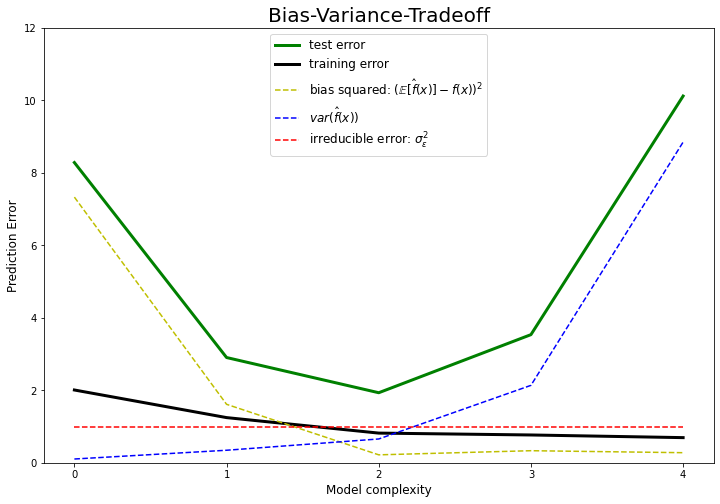

In [ ]:
plt.figure(figsize=(12, 8))


plt.plot(d_arr, np.mean(test_squared_error, 1), 'g', linewidth=3.0)  # shape: (len(d_arr),)
plt.plot(d_arr, np.mean(train_squared_error, 1), 'k', linewidth=3.0)  # shape: (len(d_arr),)
plt.plot(d_arr, np.mean(bias_squared, 1), 'y--')  # shape: (len(d_arr),)
plt.plot(d_arr, np.mean(var_y_hat_test, 1), 'b--')  # shape: (len(d_arr),)
plt.plot(d_arr, (sigma_epsilon ** 2) * np.ones_like(d_arr), 'r--')

# Labeling the plot
plt.xticks(d_arr)
plt.xlabel('Model complexity', size=12)
plt.ylabel('Prediction Error', size=12)
plt.title("Bias-Variance-Tradeoff", size=20)
plt.legend(['test error', 'training error', r'bias squared: $(\mathbb{E}[\hat{f}(x)] - f(x))^2$',
            r'$var(\hat{f}(x))$', r'irreducible error: $\sigma_\epsilon^2$'], loc='upper center', fontsize=12)
plt.ylim([0, 12])

plt.show()

- When our model suffers from **high bias**, the average response of the model is far from the true value and we call this **underfitting**. 
- When our model suffers from **high variance**, this is usually a result of its inability to generalize well beyond the training data and we call this **overfitting**. 
- **Our goal** is to build a model that achieves a balance between bias and variance so that the combined error of these two competing forces is minimum. 
- This is the **middle zone** in the above plot!